In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel(r'C:\Users\253933\Downloads\output2.xlsx')
print(data)

         Seasons  Total Accidents_seasons  People Killed_seasons     Zones  \
0    Pre-Monsoon                    13313                   1542  Northern   
1        Monsoon                    12826                   1322   Central   
2   Post-Monsoon                    13281                   1423  Southern   
3    Pre-Monsoon                    12979                   1423  Northern   
4        Monsoon                    12268                   1323   Central   
5   Post-Monsoon                    13233                   1385  Southern   
6    Pre-Monsoon                    13799                   1568  Northern   
7        Monsoon                    12441                   1263   Central   
8   Post-Monsoon                    13941                   1472  Southern   
9    Pre-Monsoon                    14257                   1668  Northern   
10       Monsoon                    12608                   1271   Central   
11  Post-Monsoon                    14246                   1501

In [5]:
pre_monsoon_data = data[data['Seasons'] == 'Pre-Monsoon']
monsoon_data = data[data['Seasons'] == 'Monsoon']
post_monsoon_data = data[data['Seasons'] == 'Post-Monsoon']

In [6]:
pre_monsoon_accidents_mean = pre_monsoon_data['Total Accidents_seasons'].mean()
pre_monsoon_killed_mean = pre_monsoon_data['People Killed_seasons'].mean()

monsoon_accidents_mean = monsoon_data['Total Accidents_seasons'].mean()
monsoon_killed_mean = monsoon_data['People Killed_seasons'].mean()

post_monsoon_accidents_mean = post_monsoon_data['Total Accidents_seasons'].mean()
post_monsoon_killed_mean = post_monsoon_data['People Killed_seasons'].mean()

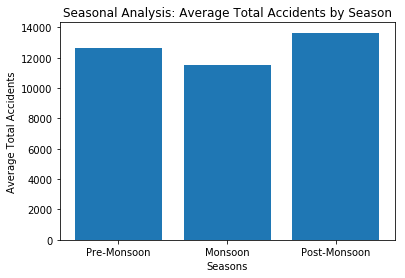

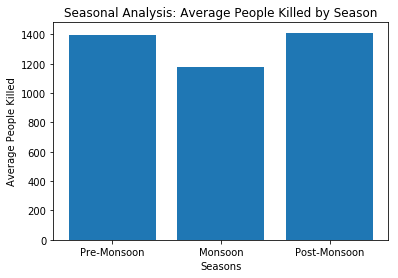

In [7]:
seasons = ['Pre-Monsoon', 'Monsoon', 'Post-Monsoon']
accidents_means = [pre_monsoon_accidents_mean, monsoon_accidents_mean, post_monsoon_accidents_mean]
killed_means = [pre_monsoon_killed_mean, monsoon_killed_mean, post_monsoon_killed_mean]

# Plotting bar chart for average number of accidents
plt.bar(seasons, accidents_means)
plt.xlabel('Seasons')
plt.ylabel('Average Total Accidents')
plt.title('Seasonal Analysis: Average Total Accidents by Season')
plt.show()

# Plotting bar chart for average number of fatalities
plt.bar(seasons, killed_means)
plt.xlabel('Seasons')
plt.ylabel('Average People Killed')
plt.title('Seasonal Analysis: Average People Killed by Season')
plt.show()

### Trend Analysis

In [18]:
data = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='Sheet3')
print(data)

    Years       Seasons  Total Accidents_seasons  People Killed_seasons  \
0    2016   Pre-Monsoon                    13313                   1542   
1    2016       Monsoon                    12826                   1322   
2    2016  Post-Monsoon                    13281                   1423   
3    2017   Pre-Monsoon                    12979                   1423   
4    2017       Monsoon                    12268                   1323   
5    2017  Post-Monsoon                    13233                   1385   
6    2018   Pre-Monsoon                    13799                   1568   
7    2018       Monsoon                    12441                   1263   
8    2018  Post-Monsoon                    13941                   1472   
9    2019   Pre-Monsoon                    14257                   1668   
10   2019       Monsoon                    12608                   1271   
11   2019  Post-Monsoon                    14246                   1501   
12   2020   Pre-Monsoon  

In [19]:
# Extract the relevant columns for trend analysis
trend_data = data[['Years', 'Total Accidents_seasons', 'People Killed_seasons']]

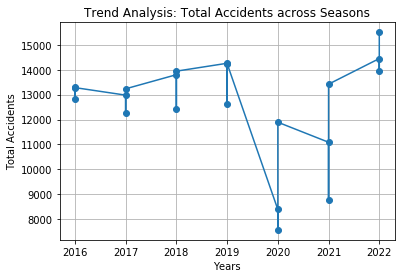

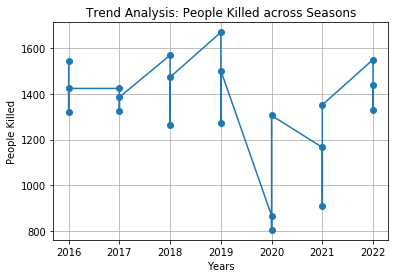

In [20]:
# Create a line plot for total accidents
plt.plot(trend_data['Years'], trend_data['Total Accidents_seasons'], marker='o')
plt.xlabel('Years')
plt.ylabel('Total Accidents')
plt.title('Trend Analysis: Total Accidents across Seasons')
plt.grid(True)
plt.show()

# Create a line plot for people killed
plt.plot(trend_data['Years'], trend_data['People Killed_seasons'], marker='o')
plt.xlabel('Years')
plt.ylabel('People Killed')
plt.title('Trend Analysis: People Killed across Seasons')
plt.grid(True)
plt.show()

In [16]:
# Extract the relevant columns for trend analysis
trend_data = data[['Seasons', 'Total Accidents_seasons', 'People Killed_seasons']]

# Group the data by seasons and calculate the sum of total accidents and people killed
trend_data = trend_data.groupby('Seasons').sum().reset_index()


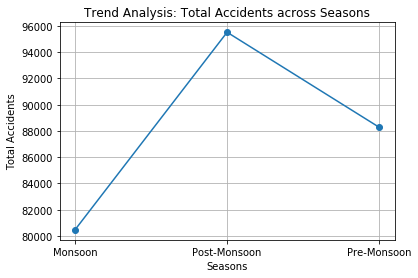

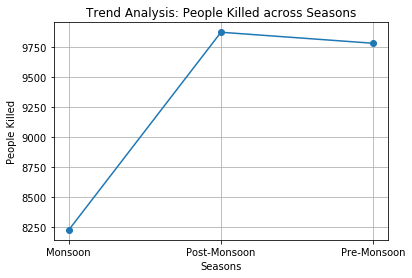

In [17]:
# Create a line plot for total accidents
plt.plot(trend_data['Seasons'], trend_data['Total Accidents_seasons'], marker='o')
plt.xlabel('Seasons')
plt.ylabel('Total Accidents')
plt.title('Trend Analysis: Total Accidents across Seasons')
plt.grid(True)
plt.show()

# Create a line plot for people killed
plt.plot(trend_data['Seasons'], trend_data['People Killed_seasons'], marker='o')
plt.xlabel('Seasons')
plt.ylabel('People Killed')
plt.title('Trend Analysis: People Killed across Seasons')
plt.grid(True)
plt.show()

## Linear Regression

In [86]:
df = pd.read_excel(r'C:\Users\253933\Downloads\Accidents.xlsx', sheet_name='Sheet3')
print(df)

    Years       Seasons  Total Accidents_seasons  People Killed_seasons  \
0    2016   Pre-Monsoon                    13313                   1542   
1    2016       Monsoon                    12826                   1322   
2    2016  Post-Monsoon                    13281                   1423   
3    2017   Pre-Monsoon                    12979                   1423   
4    2017       Monsoon                    12268                   1323   
5    2017  Post-Monsoon                    13233                   1385   
6    2018   Pre-Monsoon                    13799                   1568   
7    2018       Monsoon                    12441                   1263   
8    2018  Post-Monsoon                    13941                   1472   
9    2019   Pre-Monsoon                    14257                   1668   
10   2019       Monsoon                    12608                   1271   
11   2019  Post-Monsoon                    14246                   1501   
12   2020   Pre-Monsoon  

### Seasons

In [41]:
# Split the dataset into independent and dependent variables
X = df['Years'].values.reshape(-1, 1)  # Independent variable: Years
y_accidents = df['Total Accidents_seasons'].values  # Dependent variable: Total Accidents_seasons
y_killed = df['People Killed_seasons'].values  # Dependent variable: People Killed_seasons

# Split the data into training and testing sets
X_train, X_test, y_accidents_train, y_accidents_test, y_killed_train, y_killed_test = train_test_split(
    X, y_accidents, y_killed, test_size=0.2, random_state=42)

In [24]:
# Create linear regression models
accidents_model = LinearRegression()
killed_model = LinearRegression()

# Train the models
accidents_model.fit(X_train, y_accidents_train)
killed_model.fit(X_train, y_killed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
# Make predictions
accidents_predictions = accidents_model.predict(X_test)
killed_predictions = killed_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

# Calculate mean squared error
accidents_mse = mean_squared_error(y_accidents_test, accidents_predictions)
killed_mse = mean_squared_error(y_killed_test, killed_predictions)

# Print the mean squared error
print('Mean Squared Error (Total Accidents_seasons):', accidents_mse)
print('Mean Squared Error (People Killed_seasons):', killed_mse)

Mean Squared Error (Total Accidents_seasons): 1024719.3770326417
Mean Squared Error (People Killed_seasons): 11747.689041695636


In [28]:
# Create an array of future years
future_years = np.array(range(2023, 2033)).reshape(-1, 1)

# Make predictions for the future years
future_accidents_predictions = accidents_model.predict(future_years)
future_killed_predictions = killed_model.predict(future_years)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Years': future_years.flatten(),
                               'Total Accidents_seasons': future_accidents_predictions,
                               'People Killed_seasons': future_killed_predictions})

# Print the predictions in table format
print(predictions_df)

   Years  Total Accidents_seasons  People Killed_seasons
0   2023             12255.077519            1209.741971
1   2024             12196.294574            1182.248062
2   2025             12137.511628            1154.754153
3   2026             12078.728682            1127.260244
4   2027             12019.945736            1099.766334
5   2028             11961.162791            1072.272425
6   2029             11902.379845            1044.778516
7   2030             11843.596899            1017.284607
8   2031             11784.813953             989.790698
9   2032             11726.031008             962.296788


In [33]:
from sklearn.metrics import r2_score

# Calculate R-squared value
accidents_r2 = r2_score(y_accidents_test, accidents_predictions)
killed_r2 = r2_score(y_killed_test, killed_predictions)

# Print the R-squared value
print('R-squared value (Total Accidents_seasons):', accidents_r2)
print('R-squared value (People Killed_seasons):', killed_r2)

R-squared value (Total Accidents_seasons): -0.06580416657441912
R-squared value (People Killed_seasons): 0.3029500777469979


In [37]:
# Calculate residuals for Total Accidents_seasons
accidents_residuals = y_accidents_test - accidents_predictions
print(accidents_residuals)

# Calculate residuals for People Killed_seasons
killed_residuals = y_killed_test - killed_predictions
print(killed_residuals)

[  646.44186047  1046.35658915 -1283.64341085   159.44186047
  1392.00775194]
[139.80066445  86.27021041 -98.72978959 -80.19933555 124.78848283]


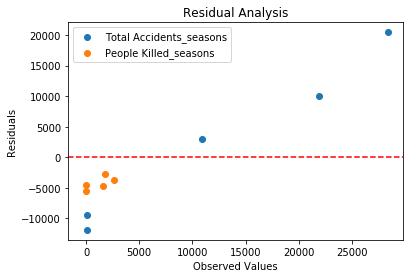

In [82]:
plt.scatter(y_accidents_test, accidents_residuals, label='Total Accidents_seasons')
plt.scatter(y_killed_test, killed_residuals, label='People Killed_seasons')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

### Zones


In [42]:
# Split the dataset into independent and dependent variables
X = df['Years'].values.reshape(-1, 1)  # Independent variable: Years
y_accidents = df['Total Accidents_zones'].values  # Dependent variable: Total Accidents_zones
y_killed = df['People Killed_zones'].values  # Dependent variable: People Killed_zones

# Split the data into training and testing sets
X_train, X_test, y_accidents_train, y_accidents_test, y_killed_train, y_killed_test = train_test_split(
    X, y_accidents, y_killed, test_size=0.2, random_state=42)

In [43]:
# Create linear regression models
accidents_model = LinearRegression()
killed_model = LinearRegression()

# Train the models
accidents_model.fit(X_train, y_accidents_train)
killed_model.fit(X_train, y_killed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Make predictions
accidents_predictions = accidents_model.predict(X_test)
killed_predictions = killed_model.predict(X_test)

# Calculate mean squared error
accidents_mse = mean_squared_error(y_accidents_test, accidents_predictions)
killed_mse = mean_squared_error(y_killed_test, killed_predictions)

# Print the mean squared error
print('Mean Squared Error (Total Accidents_seasons):', accidents_mse)
print('Mean Squared Error (People Killed_seasons):', killed_mse)

Mean Squared Error (Total Accidents_seasons): 24076653.537155487
Mean Squared Error (People Killed_seasons): 346755.6669396585


In [45]:
# Create an array of future years
future_years = np.array(range(2023, 2033)).reshape(-1, 1)

# Make predictions for the future years
future_accidents_predictions = accidents_model.predict(future_years)
future_killed_predictions = killed_model.predict(future_years)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Years': future_years.flatten(),
                               'Total Accidents_zones': future_accidents_predictions,
                               'People Killed_zones': future_killed_predictions})

# Print the predictions in table format
print(predictions_df)

   Years  Total Accidents_zones  People Killed_zones
0   2023           13802.609081          1382.013289
1   2024           14079.457364          1392.279070
2   2025           14356.305648          1402.544850
3   2026           14633.153931          1412.810631
4   2027           14910.002215          1423.076412
5   2028           15186.850498          1433.342193
6   2029           15463.698782          1443.607973
7   2030           15740.547065          1453.873754
8   2031           16017.395349          1464.139535
9   2032           16294.243632          1474.405316


In [46]:
# Calculate R-squared value
accidents_r2 = r2_score(y_accidents_test, accidents_predictions)
killed_r2 = r2_score(y_killed_test, killed_predictions)

# Print the R-squared value
print('R-squared value (Total Accidents_zones):', accidents_r2)
print('R-squared value (People Killed_zones):', killed_r2)

R-squared value (Total Accidents_zones): -0.17459995210495682
R-squared value (People Killed_zones): -0.05321181661462271


In [47]:
# Calculate residuals for Total Accidents_seasons
accidents_residuals = y_accidents_test - accidents_predictions
print(accidents_residuals)

# Calculate residuals for People Killed_seasons
killed_residuals = y_killed_test - killed_predictions
print(killed_residuals)

[ 5124.32890365 -6848.91251384  1202.08748616  3791.32890365
 -5603.36766334]
[ 910.84717608 -763.48172757  120.51827243   11.84717608 -553.68438538]


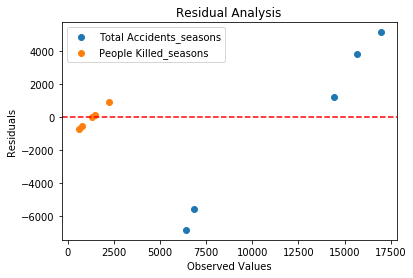

In [48]:
plt.scatter(y_accidents_test, accidents_residuals, label='Total Accidents_seasons')
plt.scatter(y_killed_test, killed_residuals, label='People Killed_seasons')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

### Roads

In [49]:
# Split the dataset into independent and dependent variables
X = df['Years'].values.reshape(-1, 1)  # Independent variable: Years
y_accidents = df['Total Accidents_roads'].values  # Dependent variable: Total Accidents_roads
y_killed = df['People Killed_roads'].values  # Dependent variable: People Killed_roads

# Split the data into training and testing sets
X_train, X_test, y_accidents_train, y_accidents_test, y_killed_train, y_killed_test = train_test_split(
    X, y_accidents, y_killed, test_size=0.2, random_state=42)

In [59]:
# Create linear regression models
accidents_model = LinearRegression()
killed_model = LinearRegression()

# Train the models
accidents_model.fit(X_train, y_accidents_train)
killed_model.fit(X_train, y_killed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# Make predictions
accidents_predictions = accidents_model.predict(X_test)
killed_predictions = killed_model.predict(X_test)

# Calculate mean squared error
accidents_mse = mean_squared_error(y_accidents_test, accidents_predictions)
killed_mse = mean_squared_error(y_killed_test, killed_predictions)

# Print the mean squared error
print('Mean Squared Error (Total Accidents_roads):', accidents_mse)
print('Mean Squared Error (People Killed_roads):', killed_mse)

Mean Squared Error (Total Accidents_roads): 46060929.5072446
Mean Squared Error (People Killed_roads): 270110.74784825847


In [52]:
# Create an array of future years
future_years = np.array(range(2023, 2033)).reshape(-1, 1)

# Make predictions for the future years
future_accidents_predictions = accidents_model.predict(future_years)
future_killed_predictions = killed_model.predict(future_years)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Years': future_years.flatten(),
                               'Total Accidents_roads': future_accidents_predictions,
                               'People Killed_roads': future_killed_predictions})

# Print the predictions in table format
print(predictions_df)

   Years  Total Accidents_zones  People Killed_zones
0   2023           10698.583610          1086.215947
1   2024           10248.589147          1028.534884
2   2025            9798.594684           970.853821
3   2026            9348.600221           913.172757
4   2027            8898.605759           855.491694
5   2028            8448.611296           797.810631
6   2029            7998.616833           740.129568
7   2030            7548.622370           682.448505
8   2031            7098.627907           624.767442
9   2032            6648.633444           567.086379


In [53]:
# Calculate R-squared value
accidents_r2 = r2_score(y_accidents_test, accidents_predictions)
killed_r2 = r2_score(y_killed_test, killed_predictions)

# Print the R-squared value
print('R-squared value (Total Accidents_roads):', accidents_r2)
print('R-squared value (People Killed_roads):', killed_r2)

R-squared value (Total Accidents_roads): -0.11086998844071694
R-squared value (People Killed_roads): -0.17110812096809025


In [54]:
# Calculate residuals for Total Accidents_seasons
accidents_residuals = y_accidents_test - accidents_predictions
print(accidents_residuals)

# Calculate residuals for People Killed_seasons
killed_residuals = y_killed_test - killed_predictions
print(killed_residuals)

[-4639.5448505   6359.42746401 -3550.57253599 -6713.5448505
 10519.4440753 ]
[-226.9833887   484.42192691 -226.57807309 -604.9833887   804.37873754]


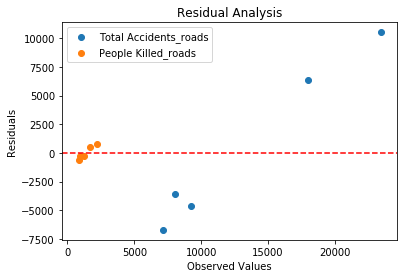

In [56]:
plt.scatter(y_accidents_test, accidents_residuals, label='Total Accidents_roads')
plt.scatter(y_killed_test, killed_residuals, label='People Killed_roads')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

### Time

In [58]:
# Split the dataset into independent and dependent variables
X = df['Years'].values.reshape(-1, 1)  # Independent variable: Years
y_accidents = df['Total Accidents_time'].values  # Dependent variable: Total Accidents_time
y_killed = df['People Killed_time'].values  # Dependent variable: People Killed_time

# Split the data into training and testing sets
X_train, X_test, y_accidents_train, y_accidents_test, y_killed_train, y_killed_test = train_test_split(
    X, y_accidents, y_killed, test_size=0.2, random_state=42)

In [60]:
# Create linear regression models
accidents_model = LinearRegression()
killed_model = LinearRegression()

# Train the models
accidents_model.fit(X_train, y_accidents_train)
killed_model.fit(X_train, y_killed_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Make predictions
accidents_predictions = accidents_model.predict(X_test)
killed_predictions = killed_model.predict(X_test)

# Calculate mean squared error
accidents_mse = mean_squared_error(y_accidents_test, accidents_predictions)
killed_mse = mean_squared_error(y_killed_test, killed_predictions)

# Print the mean squared error
print('Mean Squared Error (Total Accidents_time):', accidents_mse)
print('Mean Squared Error (People Killed_time):', killed_mse)

Mean Squared Error (Total Accidents_time): 151462711.3438198
Mean Squared Error (People Killed_time): 18725353.764166217


In [67]:
# Create an array of future years
future_years = np.array(range(2023, 2033)).reshape(-1, 1)

# Make predictions for the future years
future_accidents_predictions = accidents_model.predict(future_years)
future_killed_predictions = killed_model.predict(future_years)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Years': future_years.flatten(),
                               'Total Accidents_time': future_accidents_predictions,
                               'People Killed_time': future_killed_predictions})

# Print the predictions in table format
print(predictions_df)

   Years  Total Accidents_time  People Killed_time
0   2023          13544.236988         3807.940199
1   2024          14353.643411         3454.744186
2   2025          15163.049834         3101.548173
3   2026          15972.456257         2748.352159
4   2027          16781.862680         2395.156146
5   2028          17591.269103         2041.960133
6   2029          18400.675526         1688.764120
7   2030          19210.081949         1335.568106
8   2031          20019.488372          982.372093
9   2032          20828.894795          629.176080


In [68]:
# Calculate R-squared value
accidents_r2 = r2_score(y_accidents_test, accidents_predictions)
killed_r2 = r2_score(y_killed_test, killed_predictions)

# Print the R-squared value
print('R-squared value (Total Accidents_time):', accidents_r2)
print('R-squared value (People Killed_time):', killed_r2)

R-squared value (Total Accidents_time): -0.16334437046687977
R-squared value (People Killed_time): -16.49745515107706


In [64]:
# Calculate residuals for Total Accidents_seasons
accidents_residuals = y_accidents_test - accidents_predictions
print(accidents_residuals)

# Calculate residuals for People Killed_seasons
killed_residuals = y_killed_test - killed_predictions
print(killed_residuals)

[ 20457.60797342 -11871.42414175   9977.57585825   3048.60797342
  -9435.20487265]
[-3681.31229236 -4501.33222591 -2702.33222591 -4641.31229236
 -5564.92026578]


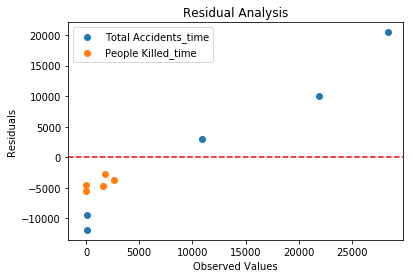

In [69]:
plt.scatter(y_accidents_test, accidents_residuals, label='Total Accidents_time')
plt.scatter(y_killed_test, killed_residuals, label='People Killed_time')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Observed Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
# Load the dataset
data = pd.DataFrame({
    'Years': [2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019,
              2020, 2020, 2020, 2021, 2021, 2021, 2022, 2022, 2022],
    'Seasons': ['Pre-Monsoon', 'Monsoon', 'Post-Monsoon', 'Pre-Monsoon', 'Monsoon',
                'Post-Monsoon', 'Pre-Monsoon', 'Monsoon', 'Post-Monsoon', 'Pre-Monsoon',
                'Monsoon', 'Post-Monsoon', 'Pre-Monsoon', 'Monsoon', 'Post-Monsoon',
                'Pre-Monsoon', 'Monsoon', 'Post-Monsoon', 'Pre-Monsoon', 'Monsoon',
                'Post-Monsoon'],
    'Total Accidents_seasons': [13313, 12826, 13281, 12979, 12268, 13233, 13799, 12441,
                                13941, 14257, 12608, 14246, 8392, 7572, 11893, 11089,
                                8788, 13419, 14446, 13962, 15502],
    'People Killed_seasons': [1542, 1322, 1423, 1423, 1323, 1385, 1568, 1263, 1472, 1668,
                              1271, 1501, 868, 806, 1305, 1166, 912, 1351, 1549, 1329,
                              1439]
})

In [81]:
# Create a pivot table for the seasonal data
seasonal_data = data.pivot(index='Years', columns='Seasons', values=['Total Accidents_seasons', 'People Killed_seasons'])

# Perform SARIMA forecast
forecast_periods = 10
seasonal_order = (0, 0, 0, 3)  # Example seasonal order (p, d, q, s)
seasonal_model = SARIMAX(seasonal_data['Total Accidents_seasons'], order=(1, 0, 0), seasonal_order=seasonal_order)
seasonal_results = seasonal_model.fit()
seasonal_forecast = seasonal_results.get_forecast(steps=forecast_periods)

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [ ]:
# Get the forecasted values and confidence intervals
forecast_values = seasonal_forecast.predicted_mean
ci_lower = seasonal_forecast.conf_int()['lower Total Accidents_seasons']
ci_upper = seasonal_forecast.conf_int()['upper Total Accidents_seasons']

In [ ]:
# Plot the forecast
plt.figure(figsize=(10, 6))
x = np.arange(seasonal_data.index.min(), seasonal_data.index.max() + forecast_periods)
plt.plot(seasonal_data.index, seasonal_data['Total Accidents_seasons'], label='Actual')
plt.plot(x[-forecast_periods:], forecast_values, label='Forecast')
plt.fill_between(x[-forecast_periods:], ci_lower, ci_upper, alpha=0.3)
plt.xlabel('Years')
plt.ylabel('Total Accidents (Seasons)')
plt.title('Forecast of Total Accidents (Seasons) for Next 10 Years')
plt.legend()
plt.show()

In [ ]:
# Perform SARIMA forecast for People Killed
seasonal_model_killed = SARIMAX(seasonal_data['People Killed_seasons'], order=(1, 0, 0), seasonal_order=seasonal_order)
seasonal_results_killed = seasonal_model_killed.fit()
seasonal_forecast_killed = seasonal_results_killed.get_forecast(steps=forecast_periods)

# Get the forecasted values and confidence intervals for People Killed
forecast_values_killed = seasonal_forecast_killed.predicted_mean
ci_lower_killed = seasonal_forecast_killed.conf_int()['lower People Killed_seasons']
ci_upper_killed = seasonal_forecast_killed.conf_int()['upper People Killed_seasons']

In [ ]:
# Plot the forecast for People Killed
plt.figure(figsize=(10, 6))
plt.plot(seasonal_data.index, seasonal_data['People Killed_seasons'], label='Actual')
plt.plot(x[-forecast_periods:], forecast_values_killed, label='Forecast')
plt.fill_between(x[-forecast_periods:], ci_lower_killed, ci_upper_killed, alpha=0.3)
plt.xlabel('Years')
plt.ylabel('People Killed (Seasons)')
plt.title('Forecast of People Killed (Seasons) for Next 10 Years')
plt.legend()
plt.show()
